In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [ ]:
cluster = 100
noise = 1

A = [1, 3]
B = [1, -2]

# generate data
a = [A[0] + np.random.randn(cluster) * noise, A[1] + np.random.randn(cluster) * noise]
b = [B[0] + np.random.randn(cluster) * noise, B[1] + np.random.randn(cluster) * noise]

labels_np = np.vstack((np.zeros((cluster, 1)), np.ones((cluster, 1))))

# concatanate
data_np = np.hstack((a, b)).T

# tensors
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

## Visualizing the data

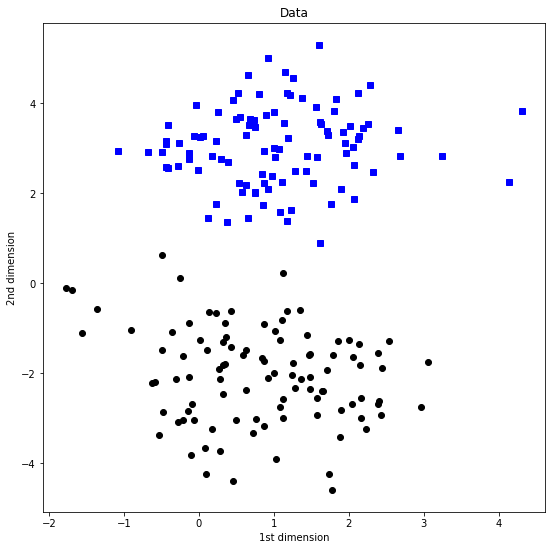

In [ ]:
plt.figure(figsize=(9, 9))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], "bs")
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], "ko")
plt.title("Data")
plt.xlabel("1st dimension")
plt.ylabel("2nd dimension")
plt.show()

## Deep Learning Model

In [ ]:
def build(lr):
  model = nn.Sequential(
      nn.Linear(2, 16),
      nn.ReLU(),
      nn.Linear(16, 1),
      nn.ReLU(),
      nn.Linear(1, 1),
      nn.Sigmoid(),
  )
  lossfun = nn.BCELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  return model, lossfun, optimizer

## Model training

In [ ]:
def train(model, lossfun, optimizer, epochs=1000):
  losses = torch.zeros(epochs)

  for e in range(epochs):
    y_hat = model(data)
    loss = lossfun(y_hat, labels)
    losses[e] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  prediction = model(data)
  acc = 100 * torch.mean(((prediction > 0.5) == labels).float())
  return losses, prediction, acc

## testing

predictions: tensor(99.5000)


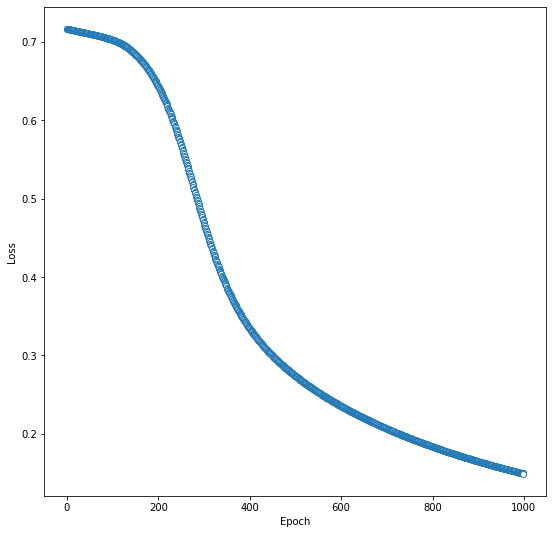

In [ ]:
model, lossfun, optimizer = build(0.01)
losses, predictons, acc = train(model, lossfun, optimizer)
print("predictions:", acc)

plt.figure(figsize=(9, 9))
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Dynamic Testing

In [ ]:
lrs = np.linspace(0.001, .1, 50)

lr_acc = []
all_losses = np.zeros((len(lrs))

for i, lr in enumerate(lrs):
  model, lossfun, optimizer = build(lr)
  losses, predictions, acc = train(model, lossfun, optimizer)
  lr_acc.append(acc)
  all_losses[i, :] = losses.detach()

## Plotting Dynamic Tesing

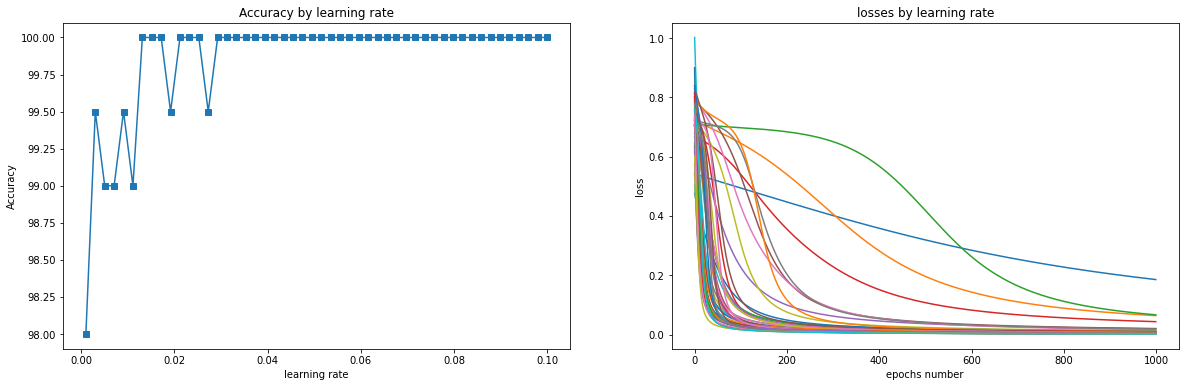

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(lrs, lr_acc, "s-")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")

ax[1].plot(all_losses.T)
ax[1].set_title("losses by learning rate")
ax[1].set_xlabel("epochs number")
ax[1].set_ylabel("loss")
plt.show()

In [ ]:
sum(torch.tensor(lr_acc) > 70) / len(lr_acc)

tensor(1.)